In [3]:
import pandas as pd
from IPython.core.display_functions import display

covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())
display(covid_data.info)

# date — дата наблюдения;
# province/state — наименование провинции/штата;
# country — наименование страны;
# confirmed — общее число зафиксированных случаев на указанный день;
# deaths — общее число зафиксированных смертей на указанный день;
# recovered — общее число выздоровлений на указанный день.

date province/state country  confirmed  deaths  recovered
0  01/22/2020          Anhui   China        1.0     0.0        0.0
1  01/22/2020        Beijing   China       14.0     0.0        0.0
2  01/22/2020      Chongqing   China        6.0     0.0        0.0
3  01/22/2020         Fujian   China        1.0     0.0        0.0
4  01/22/2020          Gansu   China        0.0     0.0        0.0

<bound method DataFrame.info of               date     province/state      country  confirmed  deaths  \
0       01/22/2020              Anhui        China        1.0     0.0   
1       01/22/2020            Beijing        China       14.0     0.0   
2       01/22/2020          Chongqing        China        6.0     0.0   
3       01/22/2020             Fujian        China        1.0     0.0   
4       01/22/2020              Gansu        China        0.0     0.0   
...            ...                ...          ...        ...     ...   
306424  05/29/2021  Zaporizhia Oblast      Ukraine   102641.0  2335.0   
306425  05/29/2021            Zeeland  Netherlands    29147.0   245.0   
306426  05/29/2021           Zhejiang        China     1364.0     1.0   
306427  05/29/2021    Zhytomyr Oblast      Ukraine    87550.0  1738.0   
306428  05/29/2021       Zuid-Holland  Netherlands   391559.0  4252.0   

        recovered  
0             0.0  
1             0.0  
2             0.0  
3          

In [5]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations',
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())
display(vaccinations_data.info)

# country — наименование страны;
# date — дата наблюдения;
# total_vaccinations — общее число введённых вакцин в стране на указанный день;
# people_vaccinated — общее число привитых первым компонентом в стране на указанный день;
# people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день;
# people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);
# people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день;
# daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);
# vaccines — комбинации вакцин, используемые в стране.

country        date  total_vaccinations  people_vaccinated  \
0  Afghanistan  2021-02-22                 0.0                0.0   
1  Afghanistan  2021-02-23                 NaN                NaN   
2  Afghanistan  2021-02-24                 NaN                NaN   
3  Afghanistan  2021-02-25                 NaN                NaN   
4  Afghanistan  2021-02-26                 NaN                NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated  \
0                            0.0                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   
3                            NaN                      NaN   
4                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations  \
0                                  NaN                 NaN   
1                                  NaN              1367.0   
2                                  NaN              1367.0   
3                                  NaN              1367.0   
4                                  NaN              1367.0   

                                            vaccines  
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...

<bound method DataFrame.info of            country        date  total_vaccinations  people_vaccinated  \
0      Afghanistan  2021-02-22                 0.0                0.0   
1      Afghanistan  2021-02-23                 NaN                NaN   
2      Afghanistan  2021-02-24                 NaN                NaN   
3      Afghanistan  2021-02-25                 NaN                NaN   
4      Afghanistan  2021-02-26                 NaN                NaN   
...            ...         ...                 ...                ...   
42790     Zimbabwe  2021-09-01           4270430.0          2615233.0   
42791     Zimbabwe  2021-09-02           4323735.0          2649505.0   
42792     Zimbabwe  2021-09-03           4372216.0          2681657.0   
42793     Zimbabwe  2021-09-04           4400246.0          2698332.0   
42794     Zimbabwe  2021-09-05           4431599.0          2713248.0   

       people_vaccinated_per_hundred  people_fully_vaccinated  \
0                         

In [18]:
import pandas as pd
from IPython.core.display_functions import display

covid_data = pd.read_csv('data/covid_data.csv')

vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations',
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

covid_data = covid_data.groupby(
    ['date', 'country'],
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

# display(covid_data['date'].min())
# display(covid_data['date'].max())

# display(vaccinations_data['date'].min())
# display(vaccinations_data['date'].max())

covid_df = pd.merge(covid_data, vaccinations_data, on=['date', 'country'], how='left')
# display(covid_df.info)

covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

# round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)

# round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

covid_df.to_csv('data/covid_df.csv', index=False)

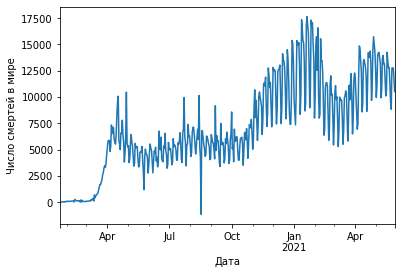

In [22]:
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line',xlabel='Дата', ylabel='Число смертей в мире');

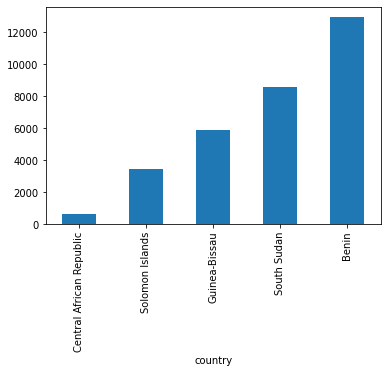

In [23]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

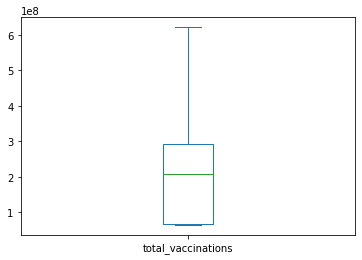

In [28]:
covid_df.groupby(['country'])['total_vaccinations'].last().nlargest(5).plot(kind='box');

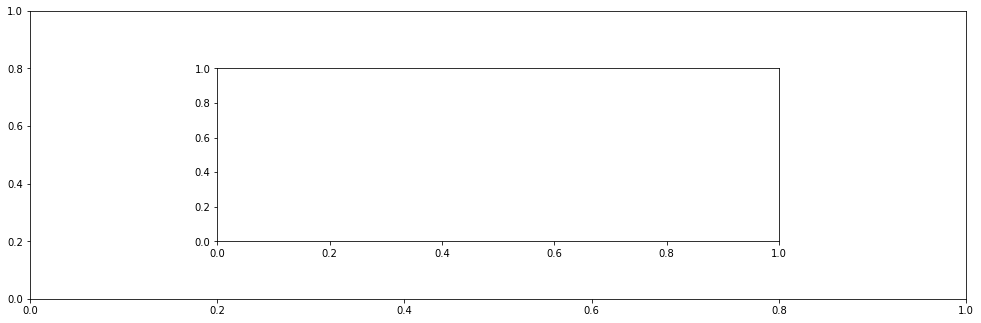

In [33]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.2, 0.2, 0.6, 0.6])

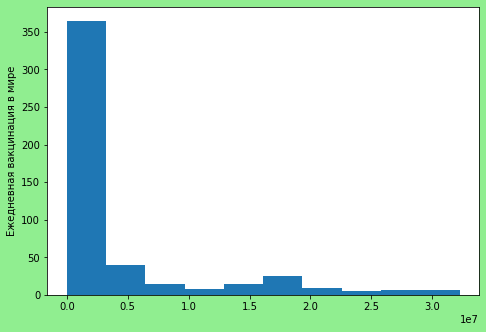

In [34]:
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(covid_df.groupby('date')['daily_vaccinations'].sum())
axes.set_ylabel('Ежедневная вакцинация в мире');

<BarContainer object of 5 artists>

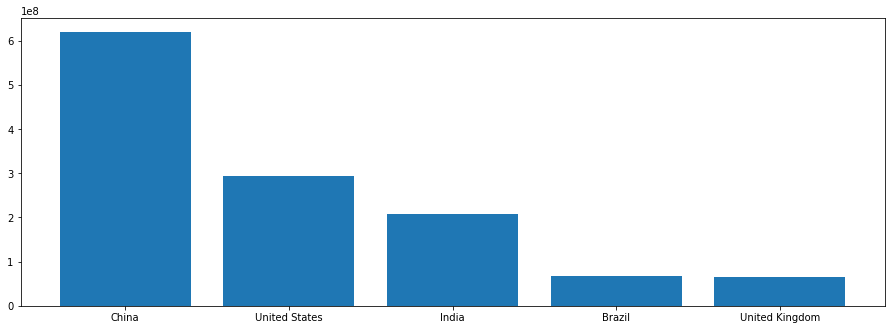

In [35]:
v = covid_df.groupby(['country'])['total_vaccinations'].last().nlargest(5)
fig = plt.figure(figsize=(12, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=v.index,height=v)

In [37]:
import pandas as pd
#используем объединенный датасет о заболеваемости и вакцинации
covid_df = pd.read_csv('data/covid_df.csv')
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

date      country  confirmed  deaths  recovered  active  \
0 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
1 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
2 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
3 2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
4 2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              0.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              0.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  
0         0.0           0.0  
1         0.0           0.0  
2         0.0           0.0  
3         0.0           0.0  
4         0.0           0.0

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100


sns.barplot(
    data=croped_covid_df,
    x='country',
    y='total_vaccinations_per_hundred',
    estimator=max
)

ValueError: Could not interpret input 'total_vaccinations_per_hundred'

Text(0.5, 1.0, 'Тепловая карта заболеваемости')

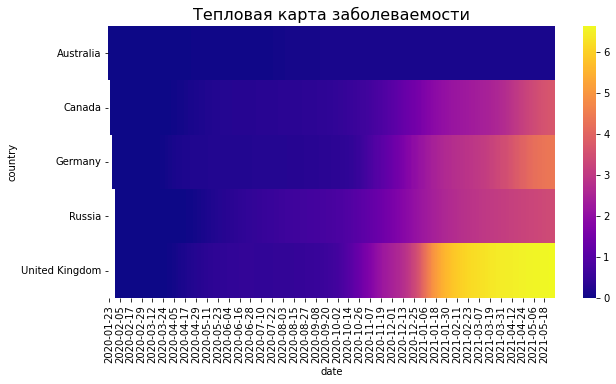

In [42]:
croped_covid_df['confirmed_per_hundred'] = croped_covid_df['confirmed']/croped_covid_df['population'] * 100
pivot = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    columns='date',
    index='country'
)
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Тепловая карта заболеваемости', fontsize=16)

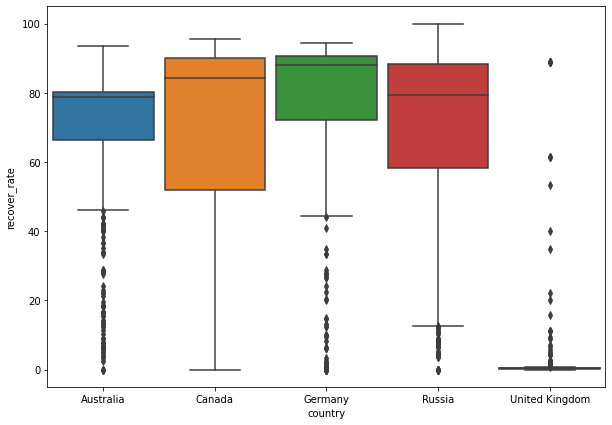

In [43]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    x='country',
    y='recover_rate',
    orient='v',
    width=0.9
)

In [47]:
import pandas as pd
#используем объединенный датасет о заболеваемости и вакцинации
covid_df = pd.read_csv('data/covid_df.csv')
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

import plotly
import plotly.express as px


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['date', 'country', 'confirmed', 'deaths', 'recovered', 'active', 'daily_confirmed', 'daily_deaths', 'daily_recovered', 'total_vaccinations', 'people_vaccinated', 'people_vaccinated_per_hundred', 'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred', 'daily_vaccinations', 'vaccines', 'death_rate', 'recover_rate'] but received: daily_vaccinations_per_million

In [48]:
line_data = covid_df.groupby('date', as_index=False)['daily_vaccinations'].sum()
fig = px.line(data_frame=line_data, x = 'date', y='daily_vaccinations')
fig.show()

In [51]:
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="total_vaccinations", #от чего зависит цвет
    hover_name="country", #группирующая переменная
    animation_frame="date", #анимационный бегунок
    color_continuous_scale='Reds', #палитра цветов
    range_color=[0, 600e6] #диапазон цвета
)

fig.show()

In [52]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()
# RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
# CustomerId — идентификатор клиента
# Surname — фамилия клиента
# CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
# Geography — страна клиента (банк международный)
# Gender — пол клиента
# Age — возраст клиента
# Tenure — сколько лет клиент пользуется услугами банка
# Balance — баланс на счетах клиента в банке
# NumOfProducts — количество услуг банка, которые приобрёл клиент
# HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
# IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
# EstimatedSalary — предполагаемая заработная плата клиента
# Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')
display(churn_data)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]